In [1]:
import numpy as np
import tensorflow as tf


In [2]:
x = np.array([[200.0, 17.0]])

In [3]:
layer_1 = tf.keras.layers.Dense(units = 3, activation = "sigmoid")
a1 = layer_1(x)

In [4]:
layer_2 = tf.keras.layers.Dense(units = 1, activation = "sigmoid")
a2 = layer_2(a1)

In [5]:
if a2 >= 0.5:
  yhat = 1
else:
  yhat = 0

In [6]:
yhat

0

In [7]:
model = tf.keras.models.Sequential([layer_1, layer_2])

In [12]:
mnist = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [13]:
mnist


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [20]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [77]:
y_train.shape

(55000,)

In [79]:
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [80]:
y_valid.shape

(5000,)

In [26]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255., (1.0/255)*X_test

In [31]:
class_names = ["нуль", "один", "два", "три", "чотири", "five", "six", "сімочка", "вісім", "9"]

In [36]:
class_names[y_train[666]]

'нуль'

In [38]:
tf.random.set_seed(42)

In [53]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28])) #input
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) #hidden 1
model.add(tf.keras.layers.Dense(100, activation="relu")) #hidden 2
model.add(tf.keras.layers.Dense(10, activation="softmax")) #output

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               235500    
                                                                 
 dense_11 (Dense)            (None, 100)               30100     
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=[28, 28]), #input
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation="relu"), #hidden 1
  tf.keras.layers.Dense(100, activation="relu"), #hidden 2
  tf.keras.layers.Dense(10, activation="softmax") #output
])

In [56]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               235500    
                                                                 
 dense_14 (Dense)            (None, 100)               30100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
hidden1 = model2.layers[1]

In [66]:
weights, biases = hidden1.get_weights()

In [68]:
weights.shape

(784, 300)

In [69]:
biases.shape

(300,)

In [73]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [81]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.9171 - val_loss: 23.8033 - val_accuracy: 0.9432
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2392 - accuracy: 0.9318 - val_loss: 22.2996 - val_accuracy: 0.9482
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2049 - accuracy: 0.9425 - val_loss: 20.4245 - val_accuracy: 0.9560
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1790 - accuracy: 0.9487 - val_loss: 16.4724 - val_accuracy: 0.9646
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1580 - accuracy: 0.9547 - val_loss: 16.1778 - val_accuracy: 0.9654
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9599 - val_loss: 15.1713 - val_accuracy: 0.9668
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1271 - accuracy: 0.9638 - val_loss: 14.5460 - val_ac

In [82]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [87]:
history_table = pd.DataFrame(history.history)

<Axes: >

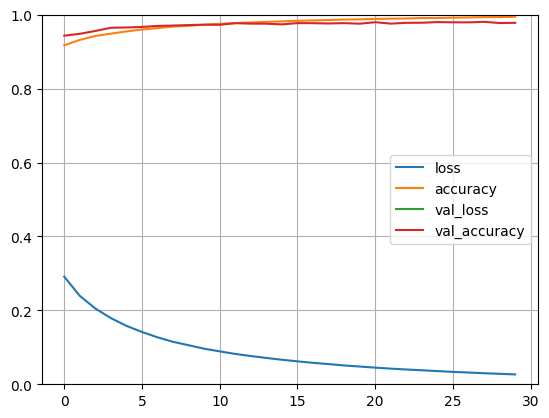

In [91]:
history_table.plot(ylim=[0,1], grid=True)

In [92]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9781


[0.06865248829126358, 0.9781000018119812]

In [94]:
X_new =X_test[:3]

In [95]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [96]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 121ms/step


In [98]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [100]:
y_pred = y_proba.argmax(axis=-1)

In [101]:
y_pred

array([7, 2, 1])

In [102]:
y_new = model.predict(X_train_full).argmax(axis=-1)

1875/1875 [==============================] - 3s 1ms/step


In [103]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [104]:
y_new

array([5, 0, 4, ..., 5, 6, 8])

In [107]:
model.save("1110.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [108]:
model.save("1110.keras")

In [109]:
!ls -l

total 4228
-rw-r--r-- 1 root root 2158792 Nov 10 07:55 1110.h5
-rw-r--r-- 1 root root 2158681 Nov 10 07:55 1110.keras
drwxr-xr-x 1 root root    4096 Nov  8 14:27 sample_data


In [110]:
!pwd

/content


In [116]:
!ls -l

total 4228
-rw-r--r-- 1 root root 2158792 Nov 10 07:55 1110.h5
-rw-r--r-- 1 root root 2158681 Nov 10 07:55 1110.keras
drwxr-xr-x 1 root root    4096 Nov  8 14:27 sample_data


In [120]:
!tensorflowjs_converter --help

2023-11-10 10:59:26.037793: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 10:59:26.045946: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 10:59:26.046034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 10:59:27.554611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: TensorFlow.js model converters. [-h]
                                       [--input_format {tf_hub,keras_keras,keras_saved_model,tf_saved_model,tfjs_layers_model,keras,tf_frozen_model}]
                                       [--ou

In [118]:
!pip install tensorflowjs

  Using cached tensorflowjs-4.13.0-py3-none-any.whl (89 kB)


In [121]:
!tensorflowjs_converter --input_format keras --output_format tfjs_layers_model ./1110.h5 dir1110


2023-11-10 11:03:19.349693: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 11:03:19.349759: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 11:03:19.349789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 11:03:20.438309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [122]:
!ls -l

total 4232
-rw-r--r-- 1 root root 2158792 Nov 10 07:55 1110.h5
-rw-r--r-- 1 root root 2158681 Nov 10 07:55 1110.keras
drwxr-xr-x 2 root root    4096 Nov 10 11:03 dir1110
drwxr-xr-x 1 root root    4096 Nov  8 14:27 sample_data


In [123]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [124]:
y_train[0]

5